In [60]:
import numpy as np
import matplotlib.pyplot as pp

# Algorithm to detect the starting point of NVM operations with current traces

## Step 1: Open a given current trace

In [64]:
data = np.genfromtxt("../Traces/07_08.txt", dtype='uint32', delimiter=",")

### Step 1.5: Create a sweeping function used later.

In [67]:
def innerLoop(index, filtData):
    # The sweep length will be the minimum between 200 samples or the end of the trace
    cond = min(200, len(filtData) - index)
    for sample in range(cond):
        # If a differential higher than 0.011 is found, the check passes
        if filtData[index + sample] > 0.011:
            return True
    return False

## Step 2: Normalize the data

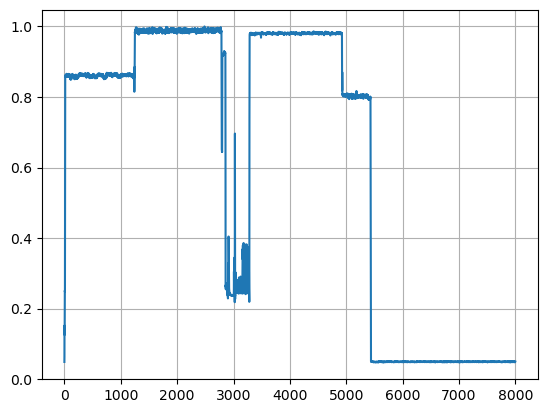

In [70]:
data1 = np.delete(data, 8000)
normData = data1/max(data1)
pp.grid()
pp.plot(normData)

# Step 3: Extract the data's differential

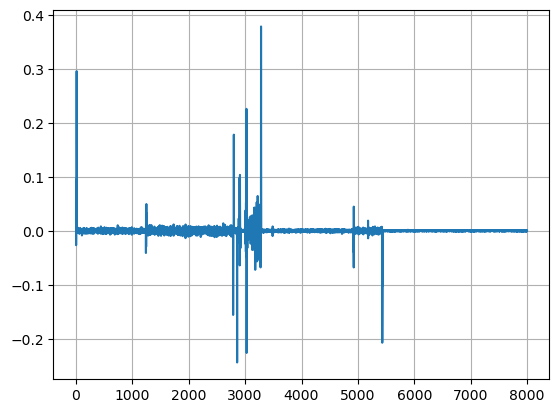

In [73]:
diffData = np.zeros(7999)
for i in range(7998):
    diffData[i] = normData[i + 1] - normData[i]
pp.grid()
pp.plot(diffData)

# Step 4: Filter the differential data

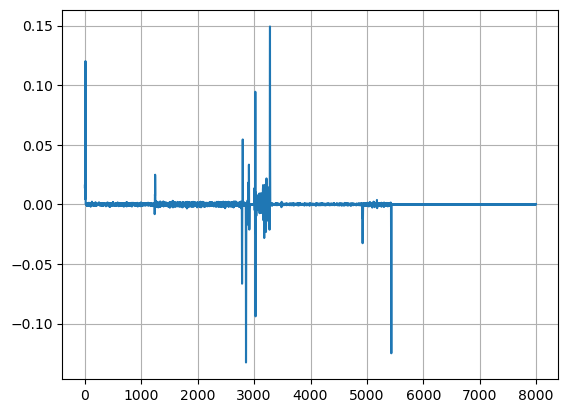

In [76]:
filterSize = 5
filtData = np.zeros(7999 - filterSize)
for i in range(7999 - filterSize):
    filtData[i] = sum(diffData[i:i+(filterSize-1)]) / filterSize
pp.grid()
pp.plot(filtData)

## Step 5: Execute the algorithm

In [79]:
NVM = 0
done = 0
index = 0
while done != 1 and index < len(filtData):
    for i in filtData:
        # If a low enough differential is found, store the sample index and call the second check
        if i < -0.011:
            NVM = index
            check = innerLoop(index, filtData)
            if check == True:
                done = 1
                break
        index += 1
# Print the detected sample number
print(NVM)

2783


Plot the final result and save the file

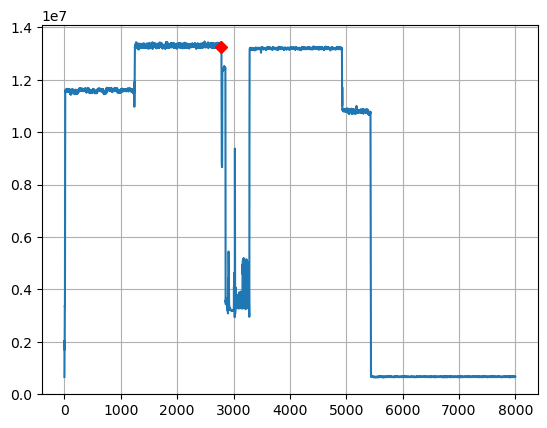

In [82]:
xs = range(len(data1))
pp.grid()
pp.plot(xs, data1)
pp.plot(NVM, data1[NVM], '-rD')
pp.savefig("07_08.png")